In [0]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

import matplotlib
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

count = pd.read_csv("gdrive/My Drive/count.csv", encoding="utf8")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
count

,myCLAC_NM,CLAC2_NM,myWEEK,n
0,1,남성가방,2018-04-01,342
1,1,남성가방,2018-04-08,278
2,1,남성가방,2018-04-15,287
3,1,남성가방,2018-04-22,337
4,1,남성가방,2018-04-29,306
5,1,남성가방,2018-05-06,375
6,1,남성가방,2018-05-13,364
7,1,남성가방,2018-05-20,353
8,1,남성가방,2018-05-27,366
9,1,남성가방,2018-06-03,455


## Example (여성의류상의)

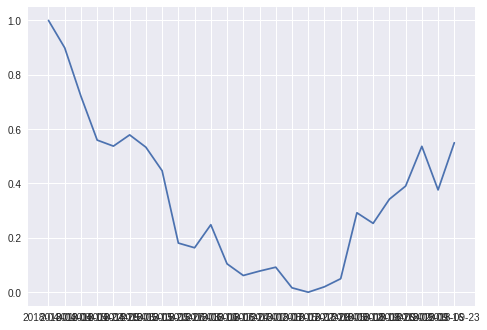

In [0]:
n = np.array(count[count["CLAC2_NM"]=="여성의류아우터"]["n"])
x = count[count["CLAC2_NM"]=="여성의류아우터"]["myWEEK"]
plt.plot(x, n)

In [0]:
f = (n-np.min(n)) / (np.max(n)-np.min(n))      # min-max scaling
f

array([1.        , 0.89908257, 0.72072315, 0.55963303, 0.53750675,
       0.57879115, 0.53345926, 0.44684296, 0.18078791, 0.16351862,
       0.24824609, 0.10442526, 0.06152186, 0.07771182, 0.09201295,
       0.01618996, 0.        , 0.01996762, 0.04964922, 0.29222882,
       0.25337291, 0.34214787, 0.39044792, 0.53669725, 0.37641662,
       0.54991905])

In [0]:
tot_length = len(x)                            # 총 길이: 26
seq_length = 8                                 # 8주 단위로 9주차를 예측

data = []
target = []
for i in range(0, tot_length - seq_length):    # i = 0, 1, ..., 17
    data.append(f[i:(i+seq_length)])           # 0-7, 1-8, 2-9, ..., 17-24
    target.append(f[i+seq_length])             # 8, 9, 10, ..., 25

In [0]:
data

[array([1.        , 0.89908257, 0.72072315, 0.55963303, 0.53750675,
        0.57879115, 0.53345926, 0.44684296]),
 array([0.89908257, 0.72072315, 0.55963303, 0.53750675, 0.57879115,
        0.53345926, 0.44684296, 0.18078791]),
 array([0.72072315, 0.55963303, 0.53750675, 0.57879115, 0.53345926,
        0.44684296, 0.18078791, 0.16351862]),
 array([0.55963303, 0.53750675, 0.57879115, 0.53345926, 0.44684296,
        0.18078791, 0.16351862, 0.24824609]),
 array([0.53750675, 0.57879115, 0.53345926, 0.44684296, 0.18078791,
        0.16351862, 0.24824609, 0.10442526]),
 array([0.57879115, 0.53345926, 0.44684296, 0.18078791, 0.16351862,
        0.24824609, 0.10442526, 0.06152186]),
 array([0.53345926, 0.44684296, 0.18078791, 0.16351862, 0.24824609,
        0.10442526, 0.06152186, 0.07771182]),
 array([0.44684296, 0.18078791, 0.16351862, 0.24824609, 0.10442526,
        0.06152186, 0.07771182, 0.09201295]),
 array([0.18078791, 0.16351862, 0.24824609, 0.10442526, 0.06152186,
        0.07771182, 

In [0]:
target

[0.18078791149487317,
 0.16351861845655694,
 0.248246087425796,
 0.10442525634106854,
 0.06152185644900162,
 0.07771181867242309,
 0.09201295196977874,
 0.016189962223421478,
 0.0,
 0.019967620075553156,
 0.0496492174851592,
 0.2922288181327577,
 0.2533729087965461,
 0.34214786832164057,
 0.3904479222881813,
 0.536697247706422,
 0.37641662169454937,
 0.5499190501888829]

In [0]:
X = np.array(data).reshape(len(data), seq_length, 1)
y = np.array(target).reshape(len(data), 1)

In [0]:
X.shape, y.shape

((18, 8, 1), (18, 1))

## LSTM 모델링 및 예측

In [0]:
model = Sequential()
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
Dropout(0.5)
model.add(Dense(16, activation='softsign'))
Dropout(0.5)
model.add(Dense(8, activation='softsign'))
Dropout(0.5)
model.add(Dense(y.shape[1], activation='linear'))
Dropout(0.5)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
18/18 [==============================] - 1s 58ms/step - loss: 0.0694
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0536
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 8/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 10/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 11/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 12/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 13/1000
18/18 [===

In [0]:
z_ = X[:1]                                                                                        # 처음 8주를 이용해 fitting이 잘 되었는지 확인
fitted = [None for i in range(seq_length)]                                                        # 8개짜리 빈 list

for i in range(tot_length - seq_length + 1):                                                      # i = 0, ..., 18
    y_ = model.predict(z_)                                                                        # 9주차 예측
    z_ = np.concatenate((z_.reshape(seq_length, 1)[1:], y_), axis=0).reshape(1, seq_length, 1)    # z_에서 맨 앞 하나를 빼고 맨 끝에 예측한 y_를 붙임
    fitted.append(y_.reshape(-1))

In [0]:
fitted_rescale = [None for i in range(seq_length)]
for fit in fitted[8:]: fitted_rescale.append(fit*(np.max(n)-np.min(n))+np.min(n))                 # min-max scaling 하기 이전으로 되돌리기

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


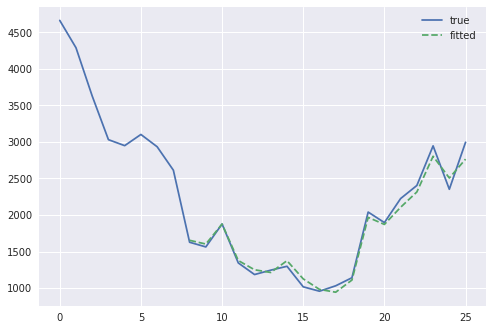

In [0]:
plt.plot(n, axes=axes)
plt.plot(fitted_rescale[:-1], linestyle="dashed")
plt.legend(["true", "fitted"])

In [0]:
y_[-1]     # 10월 첫주 예측치

array([0.5966065], dtype=float32)

In [0]:
for fit in fitted_rescale[8:-1]:
  print(int(fit), end=", ")

1653, 1602, 1875, 1376, 1250, 1213, 1374, 1125, 981, 943, 1109, 1967, 1870, 2105, 2315, 2803, 2506, 2764, 

## 128개군 예측

In [0]:
CLAC2_NM, predicted = [], []

tot_length = 26
seq_length = 8

for clac2_nm in set(count["CLAC2_NM"]):
  
  n = np.array(count[count["CLAC2_NM"]==clac2_nm]["n"])
  CLAC2_NM.append(clac2_nm)
 
  # 데이터셋 구축
  f = (n-np.min(n)) / (np.max(n)-np.min(n))
  
  data, target = [], []
  for i in range(0, tot_length - seq_length):
    data.append(f[i:(i+seq_length)])
    target.append(f[i+seq_length])
    
  X = np.array(data).reshape(len(data), seq_length, 1)
  y = np.array(target).reshape(len(data), 1)


  # 데이터 모델링
  model = Sequential()
  model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
  Dropout(0.5)
  model.add(Dense(16, activation='softsign'))
  Dropout(0.5)
  model.add(Dense(8, activation='softsign'))
  Dropout(0.5)
  model.add(Dense(y.shape[1], activation='linear'))
  Dropout(0.5)
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X, y, epochs=1000, verbose=False)

  
  # 수요 예측
  y_hat = model.predict(f[-8:].reshape([1, seq_length, 1]))
  y_hat_rescaled = y_hat*(np.max(n)-np.min(n))+np.min(n)
  predicted.append(y_hat_rescaled)

In [0]:
predict = pd.DataFrame({'CLAC2_NM':CLAC2_NM, 'predicted_count':predicted})
predict

,CLAC2_NM,predicted_count
0,선케어,[[306.81445]]
1,우산/양산류,[[532.2133]]
2,남성케어,[[774.7267]]
3,수예소품,[[551.21277]]
4,세탁기,[[69.28337]]
5,유아스킨/바디케어,[[554.7649]]
6,남성의류하의,[[2268.593]]
7,시계,[[257.08032]]
8,건강진액,[[305.70108]]
9,홈웨어,[[1228.8171]]


In [0]:
predict.to_csv("gdrive/My Drive/predict_count.csv", encoding="utf8")